In [1]:
import magmaforge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:378: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'[\*0-9]*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:382: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'\*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:4014: DeprecationWarning: invalid escape sequence \*
  """Sets the bulk composition of the system


In [2]:


def plot_phase_fractions(phase_frac_tbl, ax=None):
    mineral_frac_tbl = phase_frac_tbl.drop(columns=['Liquid','Water'])
    # mineral_frac_tbl.index = [int(iT-273) for iT in mineral_frac_tbl.index]
    mineral_frac_tbl.index = mineral_frac_tbl.index - 273
    fTOL = 1e-4
    cols = mineral_frac_tbl.max(axis=0)>fTOL

    mineral_frac_tbl.loc[::-1, cols].plot.bar(stacked=True, ax=ax)
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_xlabel('Temp [C]')
    ax.set_ylabel('Mass Fraction')
    
def plot_magma_evolution(history):
    phase_frac_tbl = history.phase_frac_table
    
    liq_comp = history.liquid_comp_table
    liq_comp.index -= 273.15


    fig, ax = plt.subplots(nrows=3, sharex=False, squeeze=True, figsize=(5,10) )

    iax = ax[0]
    plot_phase_fractions(phase_frac_tbl, ax=iax)
    iax.set_xticklabels([])
    iax.set_xlabel('')

    iax=ax[1]
    liq_comp.plot(y=['MgO','FeO','Fe2O3','Al2O3','K2O','Na2O','H2O'], ax=iax).legend(loc='upper left')
    # iax.set_xlabel('Temp [C]')
    iax.set_ylabel('Magma Comp [wt%]')
    iax.set_xticklabels([])


    iax=ax[2]
    liq_comp.plot(y='SiO2', ax=iax, legend=True)
    iax.set_xlabel('Temp [C]')
    iax.set_ylabel('Magma Comp [wt%]')


In [3]:
comp={
    'Thingmuli_MSG': {
        'SiO2':48.3622,
        'TiO2': 2.5243,
        'Al2O3': 12.8218,
        'Fe2O3': 5.3011,
        'FeO':  9.5743,
        'MnO':  0.2304,
        'MgO':  5.2089,
        'CaO':  10.1773,
        'Na2O':  2.9250,
        'K2O':  0.2604,
        'P2O5':  0.3406,
        'H2O':  0.2,},
    'Thingmuli': {
        'SiO2':49.91,
        'TiO2': 1.47,
        'Al2O3': 17.91,
        'Fe2O3': 2.45,
        'FeO':  7.02,
        'MnO':  0.0, #0.16
        'MgO':  6.62,
        'CaO':  10.02,
        'Na2O':  3.02,
        'K2O':  0.64,
        'P2O5':  0.2,
        'H2O':  0.2,},
}
T0 = 1200.00+273+50

In [4]:
sys_T = magmaforge.System(comp=comp['Thingmuli'], T0=T0, melt_frac_cutoff=.15)
S0 = sys_T.total_entropy
S0

/home/jovyan/app/src/magmaforge/system.py:173: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = Liq.covert_endmember_comp(moles_end,output='moles_elements')
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:127: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elm = entry['obj'].covert_endmember_comp(


273.2182214063738

In [5]:
sys_S = magmaforge.System(comp=comp['Thingmuli'], T0=T0, min_potential='H', S0=S0)

/home/jovyan/app/src/magmaforge/system.py:173: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = Liq.covert_endmember_comp(moles_end,output='moles_elements')
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:127: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elm = entry['obj'].covert_endmember_comp(


In [6]:
sys_T.crystallize(method='equil', Tstep=5);

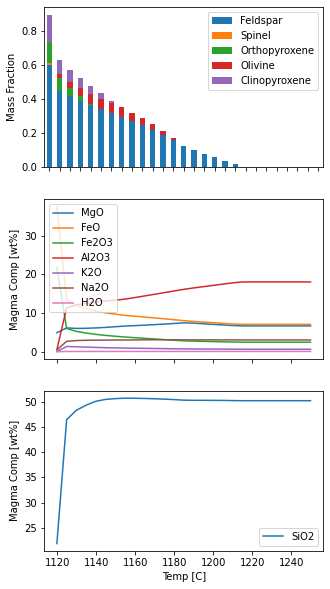

In [7]:
plot_magma_evolution(sys_T.history)

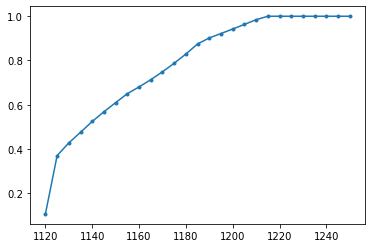

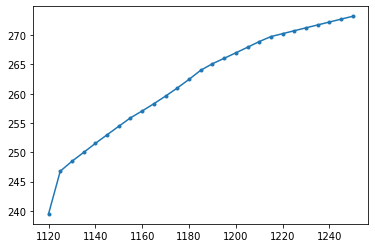

In [13]:
plt.figure()
plt.plot(sys_T.history.get_temps()-273, sys_T.history.get_melt_frac(),'.-')
plt.figure()
plt.plot(sys_T.history.get_temps()-273, sys_T.history.get_total_entropy(),'.-')

In [9]:
while(sys_S.mass_fraction > 0.15):
    sys_S.cool(dS=.5)

/home/jovyan/app/src/magmaforge/system.py:441: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elems = phs.covert_endmember_comp(mol_endmem,output='moles_elements')
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:127: DeprecatedWarning: covert_endmember_comp is deprecated as of 1.0 and will be removed in 2.0. This legacy function name has a typo. Use convert_endmember_comp instead.
  mol_elm = entry['obj'].covert_endmember_comp(


... phase addition unsuccessful. Exiting.


2022-11-11 17:47:29.272 python[1127382:1127382] Composition estimate is infeasible.
2022-11-11 17:47:29.285 python[1127382:1127382] species X0 chromite        = 0
2022-11-11 17:47:29.285 python[1127382:1127382] species X1 hercynite       = nan
2022-11-11 17:47:29.285 python[1127382:1127382] species X2 magnetite       = nan
2022-11-11 17:47:29.285 python[1127382:1127382] species X3 spinel          = nan
2022-11-11 17:47:29.285 python[1127382:1127382] species X4 ulvospinel      = nan
2022-11-11 17:47:29.285 python[1127382:1127382] species X5 magnesiochromit = 0
2022-11-11 17:47:29.285 python[1127382:1127382] species X6 magnesioferrite = nan
2022-11-11 17:47:29.285 python[1127382:1127382] species X7 qandilite       = nan
2022-11-11 17:47:29.285 python[1127382:1127382] chromite        X0 =             0, a =          -nan, mu =          -nan
2022-11-11 17:47:29.285 python[1127382:1127382] hercynite       X1 =           nan, a =          -nan, mu =          -nan
2022-11-11 17:47:29.285 pyth

... phase addition unsuccessful. Exiting.


2022-11-11 17:47:55.271 python[1127382:1127382] Composition estimate is infeasible.
2022-11-11 17:47:55.271 python[1127382:1127382] species X0 chromite        = 0
2022-11-11 17:47:55.271 python[1127382:1127382] species X1 hercynite       = nan
2022-11-11 17:47:55.271 python[1127382:1127382] species X2 magnetite       = nan
2022-11-11 17:47:55.271 python[1127382:1127382] species X3 spinel          = nan
2022-11-11 17:47:55.271 python[1127382:1127382] species X4 ulvospinel      = nan
2022-11-11 17:47:55.271 python[1127382:1127382] species X5 magnesiochromit = 0
2022-11-11 17:47:55.271 python[1127382:1127382] species X6 magnesioferrite = nan
2022-11-11 17:47:55.271 python[1127382:1127382] species X7 qandilite       = nan
2022-11-11 17:47:55.271 python[1127382:1127382] chromite        X0 =             0, a =          -nan, mu =          -nan
2022-11-11 17:47:55.271 python[1127382:1127382] hercynite       X1 =           nan, a =          -nan, mu =          -nan
2022-11-11 17:47:55.271 pyth

KeyboardInterrupt: 

Text(0, 0.5, 'Stot')

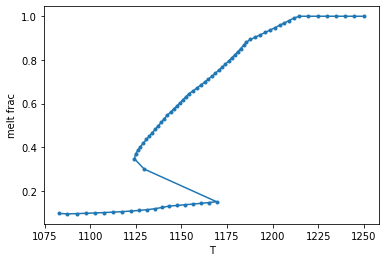

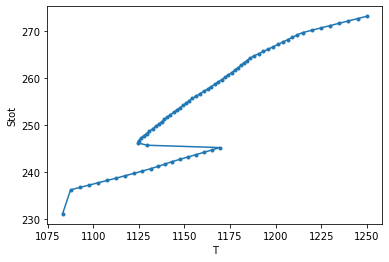

In [14]:
plt.figure()
plt.plot(sys_S.history.get_temps()-273, sys_S.history.get_melt_frac(),'.-')
plt.xlabel('T')
plt.ylabel('melt frac')
plt.figure()
plt.plot(sys_S.history.get_temps()-273, sys_S.history.get_total_entropy(),'.-')
plt.xlabel('T')
plt.ylabel('Stot')

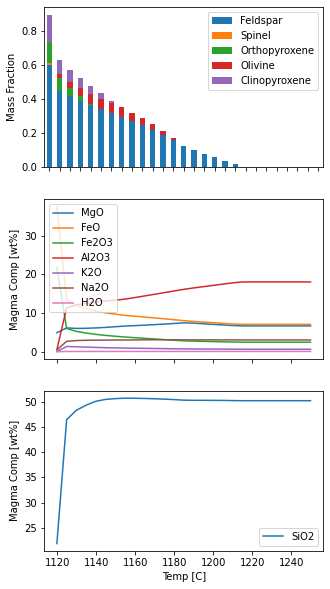

In [11]:
plot_magma_evolution(sys_T.history)

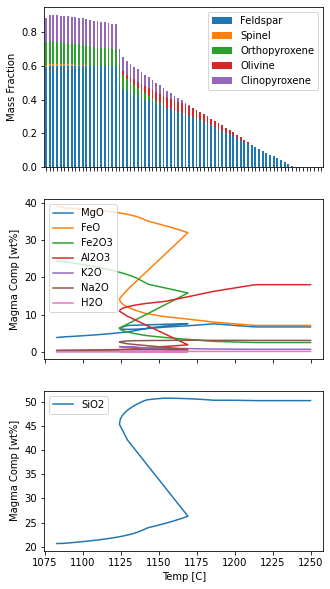

In [12]:
plot_magma_evolution(sys_S.history)

In [ ]:
def get_magma_evo_table(sys:magmaforge.System) -> pd.DataFrame:
    evo_tbl = sys.history.liquid_comp_table
    evo_tbl['rho'] = sys.history.get_liquid_densities()
    evo_tbl['rho_ref'] = sys.history.get_liquid_ref_densities()
    
    return evo_tbl

magma_evo_low = get_magma_evo_table(sys_low)
magma_evo_med = get_magma_evo_table(sys_med)
magma_evo_hi = get_magma_evo_table(sys_hi)



In [ ]:
def plot_TAS(magma_evo:pd.DataFrame, axs:list[plt.axis], color='', label='', rho_ref0=1):
    ax0 = axs[0]
    ax1 = axs[1]
    ind_SiO2_max = magma_evo['SiO2'].argmax()
    magma_evo = magma_evo.copy()
    
        
    
    magma_evo['TotAlk'] = magma_evo['Na2O'] + magma_evo['K2O']
    
    pre_Qz_evo = magma_evo.iloc[:ind_SiO2_max]
    post_Qz_evo = magma_evo.iloc[ind_SiO2_max:]
    # ax.plot(magma_evo['SiO2'], magma_evo['K2O']+magma_evo['Na2O'], '-', color=color, label=label)
    ax0.plot(pre_Qz_evo['SiO2'], pre_Qz_evo['TotAlk'], '-', color=color, label=label)
    ax0.plot(post_Qz_evo['SiO2'], post_Qz_evo['TotAlk'], ':', color=color)
    

    ax0.set_ylabel('Na$_2$O + K$_2$O  [wt%]')

    
    ax1.plot(pre_Qz_evo['SiO2'], 100*(pre_Qz_evo['rho_ref']/rho_ref0-1), '-', color=color, label=label)
    ax1.plot(post_Qz_evo['SiO2'], 100*(post_Qz_evo['rho_ref']/rho_ref0-1), ':', color=color)
    
    ax1.set_ylabel('Magma Density Change [%]')
    ax1.set_xlabel('SiO$_2$  [wt%]')


rho_ref0 = magma_evo_med.iloc[0]['rho_ref']


plt.figure()
fig, axs = plt.subplots(nrows=2, sharex=True, squeeze=True, figsize=(5,7) )
plot_TAS(magma_evo_hi, axs, color='r', label='NNO+3', rho_ref0=rho_ref0) 
plot_TAS(magma_evo_med, axs, color=[.5,.5,.5], label='NNO', rho_ref0=rho_ref0)
plot_TAS(magma_evo_low, axs, color='b', label='NNO-3', rho_ref0=rho_ref0)
plt.legend()